<a href="https://colab.research.google.com/github/haliluysal/coursera-tensorflow2-for-dl/blob/master/getting-started-with-tensorflow-2/week-2/Building_a_Sequential_model_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=16, activation='relu', name='layer_1'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# Print the model summary
# model.compile()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model

model = Sequential([
                    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), input_shape=(28,28,1)),
                    tf.keras.layers.ReLU(),
                    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
                    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=2, padding='same'),
                    tf.keras.layers.ReLU(),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(units=10),
                    tf.keras.layers.Softmax()
])

In [ ]:
# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          9280      
_________________________________________________________________
re_lu_9 (ReLU)               (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt, 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[acc, mae]
              )


In [ ]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer.lr)
print(model.metrics)


<function sparse_categorical_crossentropy at 0x7f1278c4f2f0>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [ ]:
# Print the shape of the training data
print(train_images.shape)


(60000, 28, 28, 1)


In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
train_images_norm = train_images / tf.math.reduce_max(tf.math.reduce_max(train_images))
test_images_norm = test_images / tf.math.reduce_max(tf.math.reduce_max(test_images))


Text(0.5, 1.0, 'Bag')

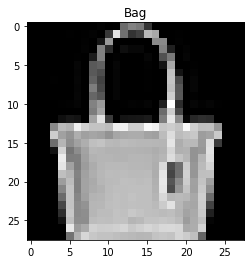

In [ ]:
# Display one of the images
rand_index = np.random.randint(low=0, high=train_images.shape[0])
plt.imshow(np.squeeze(train_images_norm[rand_index, ...]), cmap='gray')
plt.title(label=labels[train_labels[rand_index]])
# train_images_norm[rand_index, ...]

#### Fit the model

In [ ]:
# Fit the model
history = model.fit(x=train_images_norm, 
                    y=train_labels, 
                    batch_size=500,
                    epochs=10
                    )

Epoch 1/10
120/120 [==============================] - 19s 159ms/step - loss: 0.5846 - sparse_categorical_accuracy: 0.7890 - mean_absolute_error: 4.4200
Epoch 2/10
120/120 [==============================] - 19s 161ms/step - loss: 0.3471 - sparse_categorical_accuracy: 0.8771 - mean_absolute_error: 4.4200
Epoch 3/10
120/120 [==============================] - 20s 164ms/step - loss: 0.3053 - sparse_categorical_accuracy: 0.8915 - mean_absolute_error: 4.4200
Epoch 4/10
120/120 [==============================] - 19s 159ms/step - loss: 0.2770 - sparse_categorical_accuracy: 0.9022 - mean_absolute_error: 4.4200
Epoch 5/10
120/120 [==============================] - 20s 163ms/step - loss: 0.2576 - sparse_categorical_accuracy: 0.9074 - mean_absolute_error: 4.4200
Epoch 6/10
120/120 [==============================] - 19s 161ms/step - loss: 0.2387 - sparse_categorical_accuracy: 0.9144 - mean_absolute_error: 4.4200
Epoch 7/10
120/120 [==============================] - 19s 161ms/step - loss: 0.2275 - sp

#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.tail()

,loss,sparse_categorical_accuracy,mean_absolute_error
5,0.233149,0.915633,4.419999
6,0.219133,0.921533,4.420000
7,0.209378,0.925317,4.420000
8,0.197476,0.929533,4.419999
9,0.190098,0.930417,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

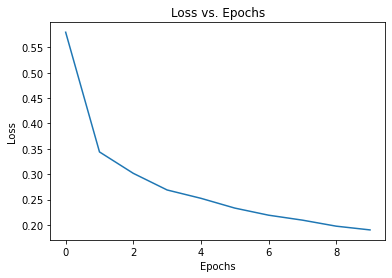

In [ ]:
# Make a plot for the loss
loss_plt = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plt.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Mean Absolute Loss'), Text(0.5, 0, 'Epochs')]

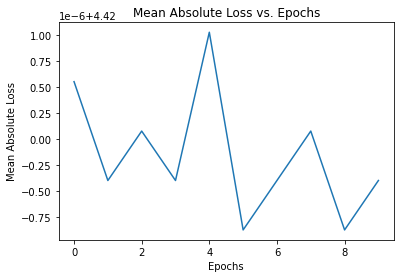

In [ ]:
# Make a plot for the accuracy
mean_abs_loss_plt = df.plot(y='mean_absolute_error', title='Mean Absolute Loss vs. Epochs', legend=False)
mean_abs_loss_plt.set(xlabel='Epochs', ylabel='Mean Absolute Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

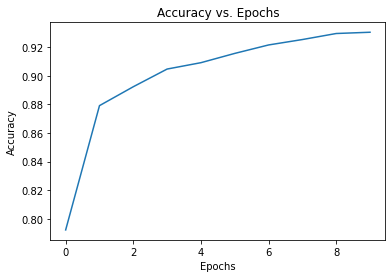

In [ ]:
# Make a plot for the additional metric
accuracy_plt = df.plot(y='sparse_categorical_accuracy', title='Accuracy vs. Epochs', legend=False)
accuracy_plt.set(xlabel='Epochs', ylabel='Accuracy')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(x=test_images_norm, y=test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2577 - sparse_categorical_accuracy: 0.9124 - mean_absolute_error: 4.4200


#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions
pred_values = model.predict(x=test_images_norm)
print(np.sum(np.argmax(pred_values, axis=1) == test_labels) / len(test_labels))

0.9124
